# Introduction to NLP Techniques in Python

**Goal 1**: Provide a basic understanding of what NLP is and why it's important. 

**Goal 2**: Overview of Python libraries: `nltk`, `spaCy`, `gensim`, `TextBlob`, `vaderSentiment`, `pyLDAvis`.


## Import necessary libraries 
Note: install the libraries once, if you haven't used them before.

In [ ]:
##############################################################
# STEP 1: Some of the NLP libraries below have dependancies to more common generic libraries that may already come pre-installed on your computer.
# You will most likely need to upgrade these common packages to make sure you have the latest versions:
##############################################################
#!pip install --upgrade scipy
#!pip install --upgrade pydantic


##############################################################
# STEP 2: Install the NLP libraries used in this example:
##############################################################
#!pip install gensim
#!pip install textblob
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install contractions
#!pip install wordcloud
#!pip install vaderSentiment
#!pip install pyLDAvis
#!pip install bertopic

In [254]:
import numpy as np
import pandas as pd
import re
from contractions import contractions_dict

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim.downloader as api
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
from spacy import displacy
from collections import Counter
import pyLDAvis
#import pyLDAvis.sklearn
import pyLDAvis.lda_model
from bertopic import BERTopic

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vitali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vitali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vitali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vitali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Text Preprocessing and Cleaning

**Objective**: Introduce the essential steps to prepare raw text data for NLP.

**Topics**:

- Tokenization (splitting text into words or sentences).
- Lowercasing, removing punctuation, and stopword removal.
- Stemming and lemmatization.

Practical Exercise: Build a small text preprocessing pipeline using nltk or spaCy to clean a dataset (e.g., scraping a few news articles).

In [25]:
text = "This is a sample sentence! Let's clean it."
tokens = word_tokenize(text.lower())
stop_words = set(stopwords.words('english'))
cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
print(cleaned_tokens)

['sample', 'sentence', 'let', 'clean']


### Removing Non-ASCII Characters
This step is essential when dealing with multilingual text or noisy datasets containing special characters, emojis, or other non-standard symbols.

In [28]:
text = "Café prices increased by 5%! 😃 #economics"
# Remove non-ASCII characters
text_clean = re.sub(r'[^\x00-\x7F]+', ' ', text)
print(text_clean)

Caf  prices increased by 5%!   #economics


### Expanding Contractions
Contractions like "isn't" or "you're" should often be expanded for better text analysis, especially in sentiment analysis.

In [31]:
def expand_contractions(text, contractions_dict=contractions_dict):
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    return text

In [33]:
text = "I can't believe it's not butter!"
expanded_text = expand_contractions(text)
print(expanded_text)

I cannot believe it is not butter!


### POS tagging, Lemmatization, and Stemming

**Lemmatization** can be made more accurate by assigning part-of-speech (POS) tags to words. This helps convert words to their base forms while considering their grammatical roles.

In [56]:
# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to convert POS tag to WordNet tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if unknown

In [58]:
text = "The cats are running quickly. I am booking my trip and will take the books with me."
text

'The cats are running quickly. I am booking my trip and will take the books with me.'

In [60]:
# Tokenize and get POS tags
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)

# Lemmatize tokens based on POS tags
lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]
print("Lemmatize tokens:\n")
print(lemmatized_tokens)

# Stem tokens
stemmed_tokens = [stemmer.stem(token) for token in tokens]
print("Temmed tokens:\n")
print(stemmed_tokens)

Lemmatize tokens:

['The', 'cat', 'be', 'run', 'quickly', '.', 'I', 'be', 'book', 'my', 'trip', 'and', 'will', 'take', 'the', 'book', 'with', 'me', '.']
Temmed tokens:

['the', 'cat', 'are', 'run', 'quickli', '.', 'i', 'am', 'book', 'my', 'trip', 'and', 'will', 'take', 'the', 'book', 'with', 'me', '.']


In [62]:
# Create a DataFrame with token, POS tag, and lemmatized token
df = pd.DataFrame({
    'Token': tokens,
    'POS Tag': [pos for token, pos in pos_tags],
    'Lemmatized Token': lemmatized_tokens,
    'Stemmed Token': stemmed_tokens
})

# Display the DataFrame
df

,Token,POS Tag,Lemmatized Token,Stemmed Token
0,The,DT,The,the
1,cats,NNS,cat,cat
2,are,VBP,be,are
3,running,VBG,run,run
4,quickly,RB,quickly,quickli
5,.,.,.,.
6,I,PRP,I,i
7,am,VBP,be,am
8,booking,VBG,book,book
9,my,PRP$,my,my


### Text Normalisation (Spelling Correction)
Misspelled words can reduce the effectiveness of text analysis. Automatic spelling correction tools can help normalize text.

In [64]:
text = "I really loove machne lerning!"
corrected_text = str(TextBlob(text).correct())
print(corrected_text)


I really love machine leaning!


In [66]:
slang_dict = {
    "u": "you",
    "r": "are",
    "lol": "laughing out loud",
    "idk": "I don't know",
}

def expand_slang(text, slang_dict=slang_dict):
    words = text.split()
    expanded_words = [slang_dict.get(word, word) for word in words]
    return " ".join(expanded_words)

text = "idk if u r coming lol"
expanded_text = expand_slang(text)
print(expanded_text)

I don't know if you are coming laughing out loud


### Custom Stopword Removal with Domain-Specific Words
In domain-specific tasks, generic stopwords removal may need to be supplemented with a custom list of words that add no value.

In [70]:
# stopwords.words('english') # check the list of all the words that are identified as stopwords

In [72]:
custom_stopwords = set(stopwords.words('english') + ['company', 'said'])

text = "The company said that it will launch the product next year."
tokens = word_tokenize(text.lower())
filtered_tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]
print(filtered_tokens)

['launch', 'product', 'next', 'year']


### Handling Negations
When performing sentiment analysis, negations (like "not" or "n't") play a crucial role in reversing sentiment polarity. Handling them carefully improves sentiment accuracy.

In [76]:
text = "I do not like this product."

def handle_negations(text):
    text = re.sub(r'\bnot\b', 'not_', text)
    return text

negation_handled_text = handle_negations(text)
print(negation_handled_text)

I do not_ like this product.


### Putting It All Together in a Text Cleaning Pipeline

In [78]:
def expand_contractions(text, contractions_dict=contractions_dict):
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    return text

def clean_text_pipeline(text):
    # Lowercase text
    text = text.lower()

    # Expand contractions
    text = expand_contractions(text)
    
    # Remove URLs, emails, and special characters
    text = re.sub(r'http\S+|@\S+|[^A-Za-z0-9\s]+', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    custom_stopwords = set(stopwords.words('english') + ['company', 'said'])
    tokens = [token for token in tokens if token.isalpha() and token not in custom_stopwords]
    
    # Lemmatization with POS tagging
    pos_tags = pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]
    
    # Join tokens back into a string
    return " ".join(tokens)

In [82]:
expand_contractions(text)

'I cannot believe the company said it would not launch the product in 2023!'

In [84]:
text = "I can't believe the company said it wouldn't launch the product in 2023!"
cleaned_text = clean_text_pipeline(text)
print(cleaned_text)

believe would launch product


**Warning:** The order of your text cleaning operations matter! 
- In the function above, try to switch places between *Expand contractions* and *Remove URLs, emails, and special characters*

## Bag of Words and TF-IDF
The Bag of Words (BoW) model is a basic but powerful method for converting text into numerical features for machine learning algorithms.

**Objective**: Review basic methods of converting text into numerical representations.

Topics:
- Bag of Words (BoW) model.
- Term Frequency-Inverse Document Frequency (TF-IDF).
- Vectorization of text.

Practical Exercise: Use sklearn to convert text into vectors using BoW and TF-IDF, followed by a simple classification task (e.g., spam detection).


In [99]:
# Example corpus
corpus = ["This is the first document.", 
          "This is the second document.",
         "And here we have a completly new document."]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the corpus into a term-document matrix
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'completly' 'document' 'first' 'have' 'here' 'is' 'new' 'second'
 'the' 'this' 'we']
[[0 0 1 1 0 0 1 0 0 1 1 0]
 [0 0 1 0 0 0 1 0 1 1 1 0]
 [1 1 1 0 1 1 0 1 0 0 0 1]]


In [101]:
# Get feature names (the words)
feature_names = vectorizer.get_feature_names_out()

# Convert the term-document matrix to an array.
# This matrix shows how many times each word appears in each document.
X_array = X.toarray()

# Display the term-document matrix as a DataFrame for better understanding
df = pd.DataFrame(X_array, columns=feature_names)
df

,and,completly,document,first,have,here,is,new,second,the,this,we
0,0,0,1,1,0,0,1,0,0,1,1,0
1,0,0,1,0,0,0,1,0,1,1,1,0
2,1,1,1,0,1,1,0,1,0,0,0,1


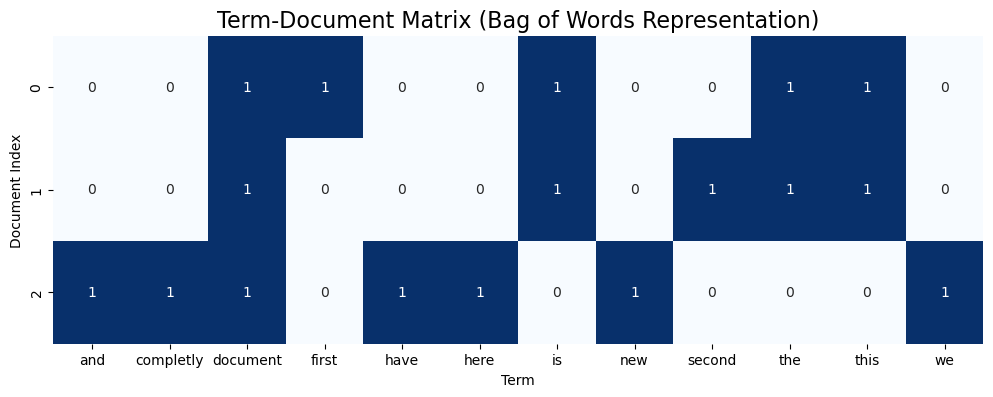

In [105]:
# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(df, annot=True, cmap="Blues", cbar=False, fmt="d")
plt.title("Term-Document Matrix (Bag of Words Representation)", fontsize=16)
plt.ylabel("Document Index")
plt.xlabel("Term")
plt.show()


**Explanation and Result**

The heatmap provides a visual representation of the term-document matrix, where:
- Rows represent the documents in the corpus.
- Columns represent the terms (words) extracted from the corpus.
- Cells contain the count of occurrences of each word in the corresponding document.
- Darker cells represent higher word frequency, while lighter cells represent lower word frequency.

## Word Embeddings

Before diving into code, it's important to grasp the concept:

- Word Embeddings (e.g., Word2Vec, GloVe, FastText) represent words as continuous-valued vectors in a multi-dimensional space.
- These vectors capture the **semantic** meaning of words based on their context in the corpus.
- Words that are **semantically similar** (e.g., "finance" and "money") tend to be close to each other in this vector space.

**Objective**: Explain how more advanced text representations work using word embeddings.

Topics:
- Word2Vec, GloVe, and FastText.
- Importance of context and relationships between words.
- Using pre-trained word embeddings.

Practical Exercise: Demonstrate how to load and use pre-trained embeddings (e.g., GloVe) and find similarities between words.

In [126]:
model = api.load('glove-wiki-gigaword-50') # 50-dimensional GloVe vectors

# Find words similar to 'finance'
similar_words = model.most_similar('finance', topn=100)
print(similar_words)

[('investment', 0.7567175030708313), ('financial', 0.7480010986328125), ('minister', 0.7453711032867432), ('foreign', 0.7445719242095947), ('banking', 0.7370334267616272), ('fund', 0.7267167568206787), ('government', 0.7261711955070496), ('treasury', 0.7190840840339661), ('cabinet', 0.7159938216209412), ('commerce', 0.7144612669944763), ('managing', 0.7133626341819763), ('portfolio', 0.7115957140922546), ('monetary', 0.7083796262741089), ('bank', 0.7077799439430237), ('reform', 0.699562132358551), ('budget', 0.6981252431869507), ('imf', 0.6975470185279846), ('agriculture', 0.6959822773933411), ('economic', 0.6943666934967041), ('affairs', 0.6913665533065796), ('policy', 0.6880799531936646), ('funds', 0.6865437626838684), ('ministers', 0.685226321220398), ('investments', 0.6817185282707214), ('ministry', 0.6816431283950806), ('planning', 0.6810324192047119), ('management', 0.6759740114212036), ('financing', 0.6703197360038757), ('office', 0.6694993376731873), ('prime', 0.667664587497711

In [128]:
# Collect the words and their corresponding vectors
words = ['finance'] + [word for word, _ in similar_words]
word_vectors = np.array([model[word] for word in words])

We'll visualize how the word "finance" and its similar words are positioned in the embedding space using dimensionality reduction techniques such as PCA and t-SNE.

In [130]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

In [132]:
# Reduce dimensions using t-SNE for better visualization
tsne = TSNE(n_components=2, perplexity=5, n_iter=300, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

In [165]:
# Function to visualize embeddings
def plot_embeddings(vectors, labels, title):
    plt.figure(figsize=(14, 8))

    # Recall the very first word is the one we query and look for similar words to it.
    
    # Plot all points except the first one with transparency
    plt.scatter(vectors[1:, 0], vectors[1:, 1], color='blue', alpha=0.5)

    # Plot the first point as a red dot
    plt.scatter(vectors[0, 0], vectors[0, 1], color='red', alpha=0.5, s=100, label=labels[0])

    # Annotate each point (first observation gets special treatment)
    for i, label in enumerate(labels):
        if i == 0:
            # First observation in red, bold, and larger font
            plt.annotate(label, (vectors[i, 0], vectors[i, 1]), 
                         fontsize=10, alpha=0.5,
                         weight='bold', color='red')
        else:
            # Other observations in smaller font
            plt.annotate(label, (vectors[i, 0], vectors[i, 1]), 
                         fontsize=8, alpha=0.5) # Reduced font size and added transparency

    plt.title(title, fontsize=16)
    plt.grid(True)
    plt.show()

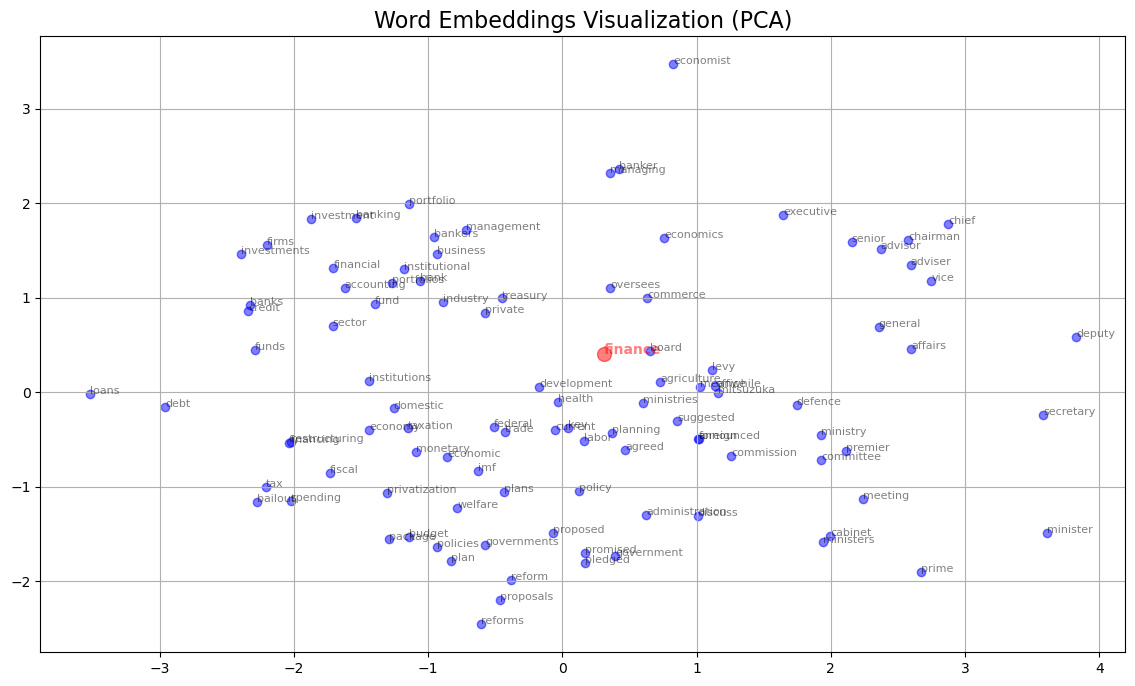

In [167]:
# Visualize using PCA
plot_embeddings(word_vectors_pca, words, "Word Embeddings Visualization (PCA)")

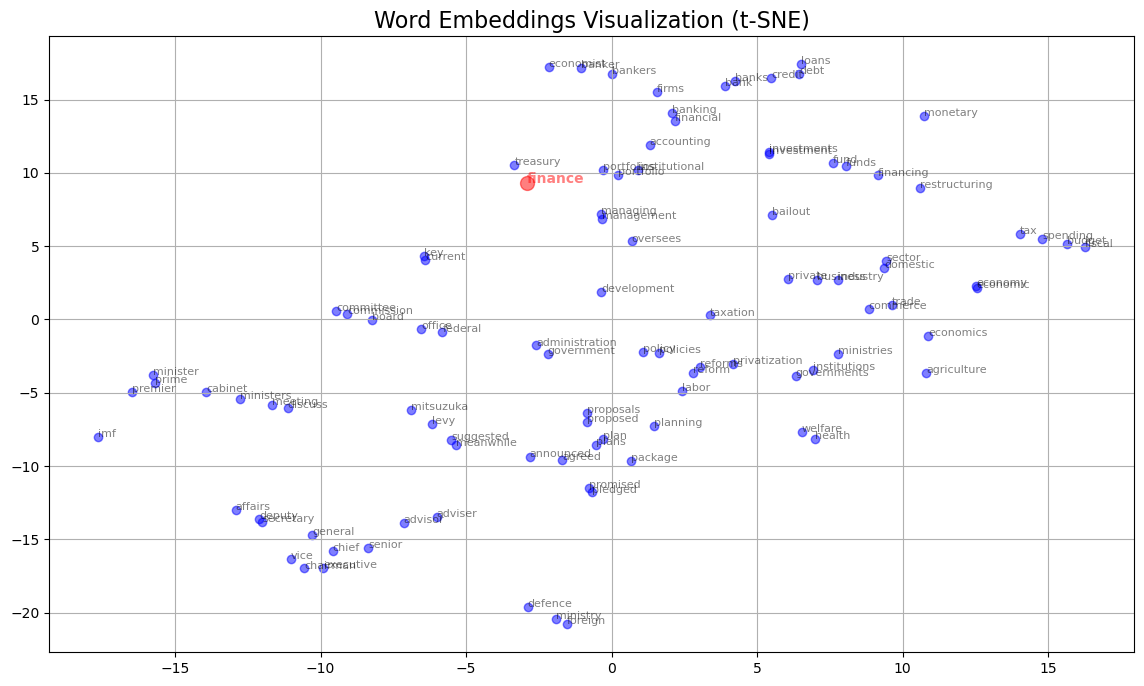

In [169]:
# Visualize using t-SNE
plot_embeddings(word_vectors_tsne, words, "Word Embeddings Visualization (t-SNE)")

#### Step-by-Step Explanation:
1. Load Pre-trained GloVe Embeddings:
    - We use the gensim.downloader to load the pre-trained GloVe vectors (glove-wiki-gigaword-50), which are 50-dimensional word vectors trained on a large corpus.
2. Find Similar Words:
    -The most_similar function retrieves the 10 words that are most similar to the word "finance" based on cosine similarity.
3. **Dimensionality Reduction for Visualization**:
    - Since word embeddings are high-dimensional (in this case, 50-dimensional), we reduce the dimensionality to 2D for visualization using two different techniques:
        - **PCA (Principal Component Analysis)**: A linear dimensionality reduction technique that projects high-dimensional data onto a lower-dimensional subspace.
        - **t-SNE (t-distributed Stochastic Neighbor Embedding)**: A non-linear dimensionality reduction technique that is well-suited for visualizing complex data like word embeddings.
4. Plotting Word Embeddings:
    - We visualize the word "finance" and the most similar words in 2D space using both PCA and t-SNE. The scatter plot shows how these words are related to each other based on the distances between their word vectors.
  
#### Key Takeaways:
- Word Similarity: Words like "financial," "money," and "investment" are very close to "finance" in the embedding space because they are semantically related.
- Dimensionality Reduction: Both PCA and t-SNE show the relationships between the words, but t-SNE often provides a better visualization for complex datasets like word embeddings.
- Importance of Visualization: Visualizing word embeddings helps students understand how the model captures the semantic relationships between words.

## Sentiment Analysis

**Objective**: Introduce sentiment analysis, one of the most common NLP applications.

Topics:
- Using TextBlob or VADER for sentiment analysis.
- Analyzing the sentiment of a dataset (e.g., movie reviews or tweets).

Practical Exercise: Sentiment analysis on real-world data, such as product reviews or financial news headlines.

In [178]:
text = "Natural language processing is amazing!"
analysis = TextBlob(text)
print(analysis.sentiment)

Sentiment(polarity=0.42500000000000004, subjectivity=0.65)


In [182]:
# Example dataset with multiple sentences
data = {
    "Text": [
        "Natural language processing is amazing!",
        "The weather is terrible today.",
        "I'm feeling really good about this project.",
        "I am so frustrated with the traffic jam.",
        "The food was fantastic and the service was excellent.",
        "This is the worst product I have ever bought.",
        "I love the new design of the website!",
        "The movie was okay, but it could have been better."
    ]
}

df = pd.DataFrame(data)
df

,Text
0,Natural language processing is amazing!
1,The weather is terrible today.
2,I'm feeling really good about this project.
3,I am so frustrated with the traffic jam.
4,The food was fantastic and the service was exc...
5,This is the worst product I have ever bought.
6,I love the new design of the website!
7,"The movie was okay, but it could have been bet..."


In [184]:
# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment from TextBlob and VADER
def analyze_sentiment(text):
    # TextBlob sentiment analysis
    blob_analysis = TextBlob(text)
    blob_polarity = blob_analysis.sentiment.polarity
    blob_subjectivity = blob_analysis.sentiment.subjectivity
    
    # VADER sentiment analysis
    vader_scores = vader_analyzer.polarity_scores(text)
    vader_compound = vader_scores['compound']
    
    return pd.Series([blob_polarity, blob_subjectivity, vader_compound])

# Apply sentiment analysis to the dataset
df[['TextBlob_Polarity', 'TextBlob_Subjectivity', 'VADER_Compound']] = df['Text'].apply(analyze_sentiment)


In [186]:
df

,Text,TextBlob_Polarity,TextBlob_Subjectivity,VADER_Compound
0,Natural language processing is amazing!,0.425000,0.650000,0.7644
1,The weather is terrible today.,-1.000000,1.000000,-0.4767
2,I'm feeling really good about this project.,0.700000,0.600000,0.5709
3,I am so frustrated with the traffic jam.,-0.700000,0.200000,-0.6560
4,The food was fantastic and the service was exc...,0.700000,0.950000,0.8074
5,This is the worst product I have ever bought.,-1.000000,1.000000,-0.6249
6,I love the new design of the website!,0.335227,0.527273,0.6696
7,"The movie was okay, but it could have been bet...",0.500000,0.500000,0.6486


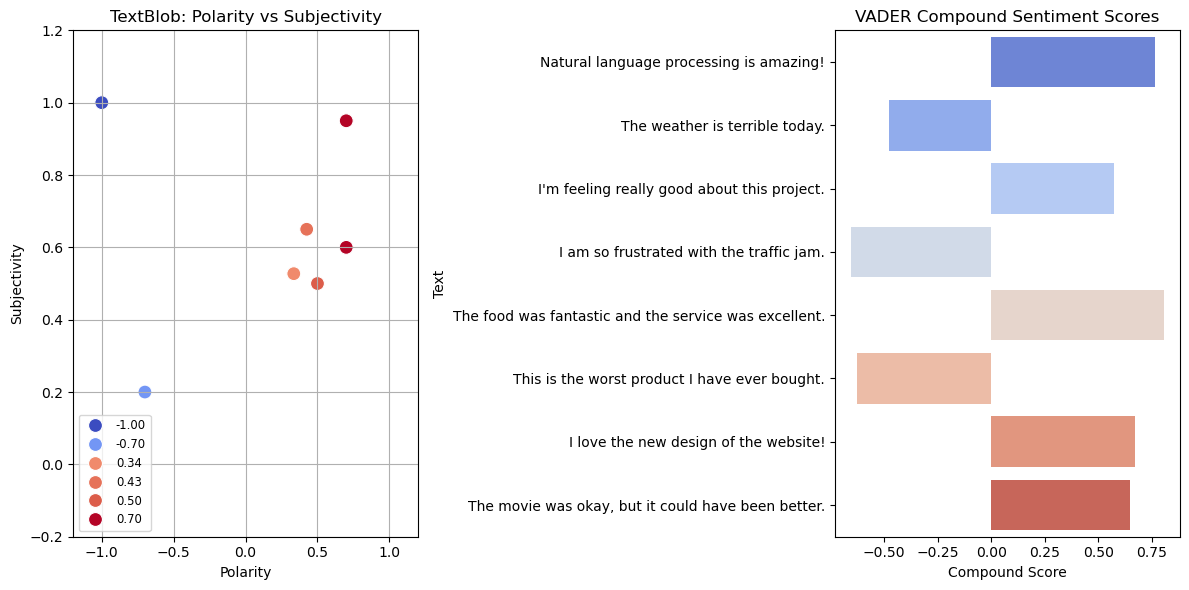

In [198]:
# Plot sentiment polarity and subjectivity
plt.figure(figsize=(12, 6))

# Plot for TextBlob polarity and subjectivity
plt.subplot(1, 2, 1)
sns.scatterplot(x='TextBlob_Polarity', y='TextBlob_Subjectivity', hue='TextBlob_Polarity', data=df, palette="coolwarm", s=100)
plt.ylim(-0.2, 1.2)           # Set y-axis limits from 0 to 1
plt.xlim(-1.2, 1.2)          # Set x-axis limits from -1 to 1

plt.title('TextBlob: Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Reduce legend font size and format values to 2 decimal places
legend = plt.legend(loc='best', fontsize='small')
for text in legend.get_texts():
    text.set_text(f'{float(text.get_text()):.2f}')
plt.grid(True)


# Plot for VADER compound sentiment
plt.subplot(1, 2, 2)
sns.barplot(x='VADER_Compound', y='Text', hue='Text', data=df, palette="coolwarm", dodge=False)
plt.title('VADER Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Text')

plt.tight_layout()
plt.show()


#### Explanation:
1. Dataset:
    - We created a simple dataset with multiple sentences that range from positive to negative in sentiment.
2. TextBlob Sentiment:
    - We calculate polarity (ranging from -1 to 1, where -1 is very negative and 1 is very positive) and subjectivity (ranging from 0 to 1, where 0 is objective and 1 is subjective) using TextBlob.
3. VADER Sentiment:
    - VADER’s compound score is a normalized sentiment score that ranges from -1 (most negative) to 1 (most positive).
4. Visualizations:
    - Scatter Plot for TextBlob: Shows the relationship between polarity (positive vs. negative sentiment) and subjectivity (objective vs. subjective sentiment) for each sentence.
    - Bar Plot for VADER: Displays the compound sentiment scores for each sentence, highlighting how positive or negative each sentence is according to VADER.

#### Key Takeaways:
- TextBlob Polarity vs. Subjectivity: The scatter plot shows how the polarity (sentiment) of sentences relates to their subjectivity. For instance, highly opinionated sentences tend to have higher subjectivity scores.
- VADER Compound Sentiment: The bar plot makes it easy to compare how VADER scores each sentence's overall sentiment.

## Named Entity Recognition (NER)

**Objective**: Introduce the concept of identifying named entities in text.

Topics:
- What is NER?
- Using spaCy for NER.
- Applications in finance (e.g., identifying companies, locations, dates).

Practical Exercise: Perform NER on financial news to extract entities such as company names, dates, or monetary values.

In [231]:
nlp = spacy.load("en_core_web_sm")
text = "Apple is looking at buying a startup in the UK for $1 billion maybe next year. The apple tree is growing in my back yard in Sydney."
doc = nlp(text)

In [233]:
doc.ents

(Apple, UK, $1 billion, next year, Sydney)

In [235]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
UK GPE
$1 billion MONEY
next year DATE
Sydney GPE


In [237]:
# Use displacy to visualize named entities
displacy.render(doc, style="ent", jupyter=True)

In [239]:
# Example financial-related text for NER
text = """
Apple is looking at buying a startup in the UK for $1 billion. 
Microsoft announced plans to acquire a new AI company based in Germany for $2.5 billion.
"""

# Process the text to extract entities
doc = nlp(text)

# Print out the named entities and their types
print("Named Entities in the Text:\n")
for ent in doc.ents:
    print(f"Entity: {ent.text} - Label: {ent.label_}")

# Visualize the named entities using displacy
displacy.render(doc, style="ent", jupyter=True)

Named Entities in the Text:

Entity: Apple - Label: ORG
Entity: UK - Label: GPE
Entity: $1 billion - Label: MONEY
Entity: Microsoft - Label: ORG
Entity: AI - Label: ORG
Entity: Germany - Label: GPE
Entity: $2.5 billion - Label: MONEY


In [243]:
# Count the occurrences of each entity type
labels = [ent.label_ for ent in doc.ents]
entity_counts = Counter(labels)

# Convert the counts to a DataFrame for easier plotting
df_entities = pd.DataFrame(entity_counts.items(), columns=['Entity', 'Count'])
df_entities

,Entity,Count
0,ORG,3
1,GPE,2
2,MONEY,2


<Figure size 800x600 with 0 Axes>

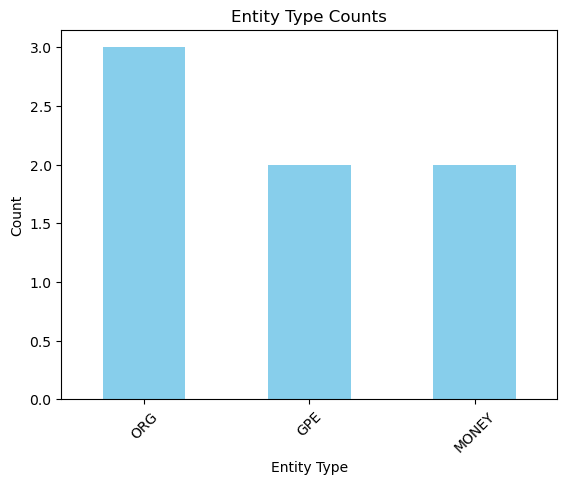

In [245]:
# Plot the entity counts using a bar chart
plt.figure(figsize=(8, 6))
df_entities.plot(kind='bar', x='Entity', y='Count', legend=False, color='skyblue')
plt.title('Entity Type Counts')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Topic Modeling

**Objective**: Teach unsupervised learning techniques for discovering the hidden structure in text.

Topics:
- Latent Dirichlet Allocation (LDA).

Practical Exercise: Perform topic modeling on a dataset of articles or financial reports to uncover major themes.

In [33]:
corpus = ["Data science is fascinating.", "Natural language processing is a part of AI."]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)
print(lda.components_)

[[1.49493343 0.50445512 0.50445512 1.49541635 1.49493343 1.49493343
  1.49493343 1.49493343 1.49493343 0.50445512]
 [0.50506657 1.49554488 1.49554488 1.50458365 0.50506657 0.50506657
  0.50506657 0.50506657 0.50506657 1.49554488]]


In [279]:
# Example corpus with multiple documents (a larger dataset)
corpus = [
    "Natural language processing is a part of artificial intelligence.",
    "Machine learning is a key aspect of AI.",
    "Data science is used in various industries.",
    "AI is transforming finance, healthcare, and transportation.",
    "Deep learning and neural networks are part of machine learning.",
    "Finance companies are using AI to detect fraud and make decisions."
    
    # Additional documents (try removing these to see how tweaking the number of topics if affecting your results)
    "Artificial intelligence is revolutionizing the medical field.",
    "Deep learning is an advanced subset of machine learning.",
    "Natural language processing helps machines understand human language.",
    "AI-powered systems are being deployed in autonomous vehicles.",
    "Data science enables better decision-making through predictive models.",
    "Machine learning algorithms are improving the accuracy of diagnoses.",
    
    "AI is creating new opportunities in the finance sector.",
    "Data scientists are highly sought after in today's job market.",
    "Deep learning models are being used for image recognition and generation.",
    "AI applications in healthcare are improving patient outcomes.",
    "Finance companies are leveraging AI to reduce operational costs.",
    "Data science techniques are improving customer experience in e-commerce.",
    
    "Natural language processing tools can automatically summarize articles.",
    "Machine learning is used to detect fraudulent activities in banking.",
    "Deep learning architectures are powering advancements in computer vision.",
    "AI is helping businesses optimize their supply chains.",
    "Data science plays a vital role in the field of cybersecurity.",
    "Machine learning models are used for real-time decision-making in trading.",
    
    "AI in transportation is improving route efficiency and safety.",
    "Data science helps identify trends and patterns in large datasets.",
    "Deep learning networks can automatically generate new images or music.",
    "Machine learning enhances personalization in marketing campaigns.",
    "AI and machine learning are driving the future of smart cities.",
    "Data science enables companies to extract valuable insights from data.",
    
    "Natural language processing allows voice assistants to communicate with users.",
    "Machine learning is revolutionizing the field of robotics.",
    "Deep learning is leading the way in breakthrough innovations in AI.",
    "AI is transforming the way companies interact with customers.",
    "Finance is increasingly reliant on AI-powered systems for decision-making.",
    "Data science is the foundation of personalized recommendations in online platforms."
]

In [281]:
# Convert text data into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

In [283]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Extract words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Get feature names (words)
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words=5)


Topic 1:
ai learning data science improving
Topic 2:
learning machine language processing natural


In [311]:
# Prepare to visualize the LDA model using pyLDAvis
pyLDAvis.enable_notebook()
lda_vis_data = pyLDAvis.lda_model.prepare(lda, X, vectorizer)

# Display the visualization OR save it to HTML document to view/share later.
# pyLDAvis.display(lda_vis_data)
pyLDAvis.save_html(lda_vis_data, 'My topic model results.html')